In [1]:
import sys

!which {sys.executable}

/ut3/jerome/miniconda3/envs/wakai/bin/python


In [2]:
import sys
sys.path.insert(0, '../code')

In [5]:
import pandas as pd

url = "https://github.com/3fon3fonov/HARPS_RVBank/raw/refs/heads/master/HARPS_RVBank_ver02.csv.zip"
df = pd.read_csv(url)
df.head()

,target,ra,dec,BJD,RV_mlc_nzp,e_RV_mlc_nzp,RV_drs_nzp,e_RV_drs_nzp,RV_mlc,e_RV_mlc,...,PROGPI,AIRMASS,OBHAB,THAR_FP,DPR_TYPE,RHKp,dRHKp,sourceflag,vsinflag,metflag
0,HD160617,265.706979,-40.322215,2.454900e+06,2.054999,1.624905,100609.364065,1.322757,7.796334,1.443621,...,UNKNOWN,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objAB,STAR_SKY_F0V,0.000028,0.000012,0,0,0
1,HD160617,265.706979,-40.322215,2.454901e+06,5.281584,1.367853,100609.433016,1.203025,11.421773,1.066969,...,UNKNOWN,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objAB,STAR_SKY_F0V,0.000018,0.000013,0,0,0
2,HD160617,265.706979,-40.322215,2.454901e+06,2.492506,1.352994,100612.508432,1.199217,8.625994,1.047846,...,UNKNOWN,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objAB,STAR_SKY_F0V,0.000017,0.000011,0,0,0
3,HD160617,265.706979,-40.322215,2.454901e+06,5.699697,1.391036,100617.060115,1.218808,11.826615,1.096518,...,UNKNOWN,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objAB,STAR_SKY_F0V,0.000012,0.000008,0,0,0
4,HD160617,265.706979,-40.322215,2.454901e+06,1.497738,1.345356,100615.688940,1.202852,7.617891,1.037948,...,UNKNOWN,-9999999,HARPS_ech_obs_all,HARPS_ech_obs_objAB,STAR_SKY_F0V,0.000027,0.000019,0,0,0


In [7]:
len(df.target.unique())

5239

In [12]:
df.columns

Index(['target', 'ra', 'dec', 'BJD', 'RV_mlc_nzp', 'e_RV_mlc_nzp',
       'RV_drs_nzp', 'e_RV_drs_nzp', 'RV_mlc', 'e_RV_mlc', 'RV_drs',
       'e_RV_drs', 'RV_mlc_j', 'e_RV_mlc_j', 'CRX', 'e_CRX', 'dLW', 'e_dLW',
       'Halpha', 'e_Halpha', 'NaD1', 'e_NaD1', 'NaD2', 'e_NaD2', 'f_RV',
       'FWHM_DRS', 'CONTRAST_DRS', 'BIS', 'RVGUESS', 'SNR_DRS', 'BJD_DRS',
       'BERV', 'BERV_DRS', 'DRIFT', 'e_DRIFT', 'SA', 'NZP_mlc', 'dNZP_mlc',
       'NZP_drs', 'dNZP_drs', 'TMMEAN', 'EXPTIME', 'MLCRX', 'E_MLCRX',
       'TIMEID', 'DRIFT_LAMP', 'MASK', 'PROGID', 'PROGPI', 'AIRMASS', 'OBHAB',
       'THAR_FP', 'DPR_TYPE', 'RHKp', 'dRHKp', 'sourceflag', 'vsinflag',
       'metflag'],
      dtype='object')

In [11]:
# name = 'RSP95-29'
name = 'TOI-6715'
df.query("target==@name")

,target,ra,dec,BJD,RV_mlc_nzp,e_RV_mlc_nzp,RV_drs_nzp,e_RV_drs_nzp,RV_mlc,e_RV_mlc,...,PROGPI,AIRMASS,OBHAB,THAR_FP,DPR_TYPE,RHKp,dRHKp,sourceflag,vsinflag,metflag


In [25]:
df.ra.min(), df.dec.min()

(0.0388, -87.25089)

In [24]:
import numpy as np

df.loc[(df['ra'] < 0) | (df['ra'] >= 360), 'ra'] = np.nan
df.loc[(df['dec'] < -90) | (df['dec'] > 90), 'dec'] = np.nan

In [26]:
from astropy.coordinates import SkyCoord

coords = SkyCoord(df.ra, df.dec, unit='deg')

In [28]:
from urllib.request import urlopen
import json

target = "TOI-6715"
url = f"https://exofop.ipac.caltech.edu/tess/target.php?id={target}&json"
response = urlopen(url)
data_json = json.loads(response.read())
data_json['coordinates']

{'ra': '159.15796838828399',
 'dec': '-64.798230771542606',
 'galactic_long': '289.1993',
 'galactic_lat': '-5.584055',
 'ecliptic_long': '209.0367',
 'ecliptic_lat': '-62.9252',
 'pm_ra': '-17.5847',
 'pm_ra_error': '.03958',
 'pm_dec': '10.2991',
 'pm_dec_error': '.0355815'}

In [29]:
ra  = float(data_json['coordinates']['ra'])      # target coord in deg
dec = float(data_json['coordinates']['dec'])       # target coord in deg
ra, dec

(159.157968388284, -64.7982307715426)

In [39]:
tcoord = SkyCoord(ra, dec, unit='deg')
idx = np.nanargmin(coords.separation(tcoord))
d = df.iloc[idx]
tcoord.separation(SkyCoord(d.ra, d.dec, unit='deg'))

<Angle 0.7476575 deg>

# Perdelwitz+2024 catalog

In [3]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Perdelwitz2024", catalog_type="rv")
tabs = cd.get_tables_from_vizier(row_limit=50_000, save=False)
df = tabs[0].to_pandas() #stellar parameters
rv = tabs[1].to_pandas() #rv data

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/683/A125


/ut3/jerome/miniconda3/envs/wakai/lib/python3.12/site-packages/astroquery/vizier/core.py:769: UserWarning: VOTABLE parsing raised exception: 54311:37: unclosed token
  warnings.warn("VOTABLE parsing raised exception: {0}".format(ex))


TableParseError: Failed to parse VIZIER result! The raw response can be found in self.response, and the error in self.table_parse_error. The attempted parsed result is in self.parsed_result.
 Exception: 54311:37: unclosed token

Text(0.5, 1.0, 'WASP-19')

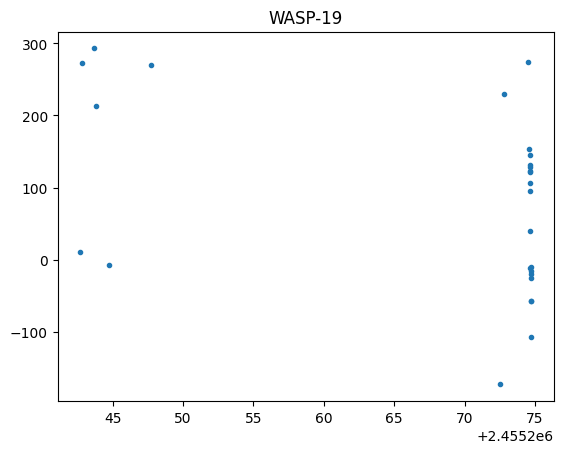

In [87]:
import matplotlib.pyplot as pl
target = 'WASP-19'
x, y = '_tab2_4', 'DRVmlc'
d = rv.query("Target==@target")
pl.plot(d[x], d[y], '.')
pl.xlabel("")
pl.title(target)

In [88]:
len(rv.Target.unique())

968

In [89]:
from catalog import get_tois

tois = get_tois()
tois.tail()

,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar Mass (M_Sun) err,Sectors,Date TOI Alerted (UTC),Date TOI Updated (UTC),Date Modified,Comments,ra_deg,dec_deg,GaiaDR3_exofop,GaiaDR3_vizier
6247,419878733,7181.01,NaN,3,4,3,3,1,4,4,...,0.142793,"56,83",2025-01-09,2025-01-09,2025-01-16 12:02:58,slight depth aperture correlation but field is...,337.675333,9.158175,NaN,NaN
6248,408469564,7182.01,NaN,2,4,2,2,1,4,4,...,0.162713,"42,56,70,83",2025-01-09,2025-01-09,2025-01-16 12:03:01,L1 candidate; low SNR,359.262125,9.784658,NaN,NaN
6249,422159302,7183.01,NaN,3,4,3,3,1,4,4,...,NaN,"16,17,24,57,76,77,83,84",2025-01-09,2025-01-09,2025-01-16 12:03:02,weak transit shape; possibly SV,335.623083,58.083092,NaN,NaN
6250,426956677,7184.01,NaN,2,4,2,2,1,4,4,...,0.127349,"57,84",2025-01-09,2025-01-09,2025-01-16 12:02:59,low SNR,2.494583,18.773831,NaN,NaN
6251,77490011,7185.01,TIC 77490011.01,1,4,1,1,1,4,4,...,0.020103,85,2025-01-09,2025-01-09,2025-01-16 12:03:02,possible odd-even; also a CTOI from Marco Mont...,42.823792,30.281303,NaN,NaN


In [76]:
# toi = tois.iloc[-1]
toi = tois.query("TOI==5095.01").squeeze()
toi

TIC ID                        434226736
TOI                             5095.01
Previous CTOI                       NaN
Master                                5
SG1A                                  5
                          ...          
Comments                        K2-25 b
ra_deg                        63.273917
dec_deg                       15.247703
GaiaDR3_exofop    3311804515502788608.0
GaiaDR3_vizier    3311804515502788608.0
Name: 4237, Length: 66, dtype: object

In [84]:
ra, dec = toi.ra_deg, toi.dec_deg

In [80]:
from catalog import get_tfop_info

In [100]:
info = get_tfop_info("WASP-19")
ra, dec = float(info['coordinates']['ra']), float(info['coordinates']['dec'])

In [101]:
from catalog import Target

t = Target(ra, dec)

In [102]:
key = "J/A+A/683/A125/table4"

In [103]:
# 
t.query_vizier_param("RVdrs")[key]

Found 1 references in Vizier with `RVdrs`.


20746.85